# Part 2 - Machine Learning

## Logistic Regression

In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


batch1 = pd.read_pickle("train_batch1.pkl")
batch2 = pd.read_pickle("train_batch2.pkl")
batch3 = pd.read_pickle("train_batch3.pkl")
batch4 = pd.read_pickle("train_batch4.pkl")
batch5 = pd.read_pickle("train_batch5.pkl")
test_batch = pd.read_pickle("test_batch1.pkl")

total__train_data = pd.concat([batch1, batch2, batch3, batch4, batch5], ignore_index=True)
total__train_data.info()

X_train = total__train_data.iloc[:, :-1]
X_train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 1025 entries, 0 to label
dtypes: uint8(1025)
memory usage: 48.9 MB


0    1    2    3    4    5    6    7    8    9   10   11   12   13  \
0       61   45   48   57   78   96  113  117  123  126  108  104  120  119   
1      171  134  103  101  130  164  187  195  152  116  106  105  121  128   
2      255  253  253  253  253  253  253  253  253  253  253  253  253  253   
3       24   33   34   37   39   36   37   22   26   31   22   29   37   48   
4      179  177  185  192  194  192  194  193  193  193  195  194  194  192   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
49995  160  165  170  171  170  170  174  178  178  178  179  182  181  180   
49996  235  236  238  239  239  237  233  231  232  234  234  233  231  230   
49997  142  143  143  145  146  146  148  149  151  152  152  152  152  155   
49998  208  205  204  203  202  201  200  200  201  200  199  199  199  201   
49999  230  238  237  234  238  243  246  246  242  237  233  233  234  232   

        14   15   16   17   18   19   20   21   22   23   24   25   26   27  \
0      112  104  112  111  101  117  116  109  111  114  126  137  142  135   
1      186  224  210  166  164  158  115   99   93   88   70   60   56   77   
2      252  253  243  225  242  237  247  252  253  252  253  253  253  253   
3       63   46   37   36   31   31   35   40   52   73   49   42   56   52   
4      192  188  188  189  189  188  187  187  185  185  184  183  181  178   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
49995  179  179  177  174  178  182  182  181  182  183  180  177  174  169   
49996  230  231  230  229  228  227  225  221  216  209  196  175  152  129   
49997  156  158  159  161  162  172  206  229  238  247  245  246  250  242   
49998  200  200  200  200  201  202  204  203  203  202  201  199  198  195   
49999  228  223  217  214  212  212  214  216  218  218  220  219  223  221   

        28   29   30   31   32   33   34   35   36   37   38   39   40   41  \
0      135  137  130  129   19    0   10   32   59   89   96   93   94   86   
1       94   91   87   79  155  151  124  128  159  162  185  187  137  110   
2      253  253  253  253  255  255  255  255  255  255  255  255  255  255   
3       41   66   71   75   28   29   27   33   29   33   33   35   47   36   
4      178  178  176  175  179  183  181  177  186  191  192  192  191  185   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
49995  165  163  162  157  168  171  170  168  169  171  174  181  184  183   
49996  102   82   76   78  234  236  238  239  239  238  235  232  233  235   
49997  211  158  132  135  151  150  150  151  152  153  156  158  160  160   
49998  193  192  191  189  209  206  205  204  204  203  203  203  202  201   
49999  217  220  224  224  222  240  235  234  236  241  245  244  240  235   

        42   43   44   45   46   47   48   49   50   51   52   53   54   55  \
0       77   74   77   81   77   80   87   78   75   95   97   91   97   90   
1      128  158  191  218  240  246  241  238  234  226  142   95   98   95   
2      255  255  255  255  255  255  233  199  186  172  236  255  255  254   
3       19   35   48   58   70   39   35   42   57   40   48   73   74   96   
4      176  184  183  172  174  186  187  185  186  185  184  185  183  182   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
49995  182  184  184  185  184  184  185  187  189  189  185  182  179  178   
49996  235  233  231  230  230  230  230  229  229  229  227  224  219  213   
49997  159  159  160  161  163  164  167  169  167  178  205  203  209  224   
49998  201  201  202  204  204  204  203  202  202  203  204  203  203  202   
49999  232  231  232  229  224  219  215  214  213  214  215  217  220  221   

        56   57   58   59   60   61   62   63   64   65   66   67   68   69  \
0       87   97   99  102  103   95   90   94   24    9   31   57   80   99   
1       89   80   66   84   92   96   77   71  152  144

In [28]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

meta_file = r"C:\Users\chiam\Documents\IT3312 - AITECH\Assignment\cifar-10-batches-py\batches.meta"
meta_data = unpickle(meta_file)

print(type(meta_data))
print(meta_data.keys()) 
print("Label Names:", meta_data['label_names'] )


<class 'dict'>
dict_keys(['num_cases_per_batch', 'label_names', 'num_vis'])
Label Names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [29]:
label_names = meta_data['label_names']
print("Labels:", label_names)

Labels: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [30]:
X_train.shape

(50000, 1024)

In [31]:
y_train = total__train_data['label']
y_train

0        6
1        9
2        9
3        4
4        1
        ..
49995    2
49996    6
49997    9
49998    1
49999    1
Name: label, Length: 50000, dtype: uint8

In [32]:
y_train.shape

(50000,)

In [33]:
y_train.describe()

count    50000.00000
mean         4.50000
std          2.87231
min          0.00000
25%          2.00000
50%          4.50000
75%          7.00000
max          9.00000
Name: label, dtype: float64

In [34]:
y_train.dtype

dtype('uint8')

In [35]:
X_train.iloc[0:1, :]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

In [36]:
X_train.iloc[0].to_numpy()

array([ 61,  45,  48, ..., 189, 124,  99], dtype=uint8)

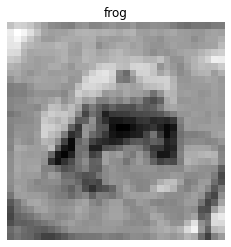

In [37]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X_train.iloc[0]
some_digit_image = X_train.iloc[0].values.reshape(32, 32, 1)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.title(label_names[y_train[0]])
plt.axis("off")
plt.show()

In [15]:
X_test = test_batch.iloc[:, :-1]
X_test

0    1    2    3    4    5    6    7    8    9   10   11   12   13  \
0     119  118  123  125  119  115  121  119  117  119  121  119  119  123   
1     235  231  232  232  232  232  232  232  232  232  233  233  233  233   
2     184  182  161  153  188  203  207  212  216  219  221  216  227  230   
3     155  175  180  193  185  171  172  172  174  180  185  186  186  186   
4      65   76   57   39   29   50   63   67   69   59   16   26   60   65   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
9995   84   84   85   85   84   86   86   86   87   89   92   91   91   90   
9996   63   74   81   86   90   95   93   98  102  110  113  112  106   96   
9997   16   15   14   14   13   12   11   10    9    8    7    7    6    5   
9998   32   26   33   23   24   48   71   87  110  133   89   33   18   14   
9999   76  103  105   82   63  153  225  186  132  226  184  229  241  238   

       14   15   16   17   18   19   20   21   22   23   24   25   26   27  \
0     124  126  123  119  117  118  116  112  113  111  112  106  104  104   
1     233  232  232  232  232  232  232  232  232  233  232  233  232  232   
2     233  236  219  232  237  239  240  237  239  239  241  230  234  242   
3     183  183  181  180  184  186  187  187  188  189  187  187  188  195   
4      62   59   77  106  110  107  112   97   74   71  124  120   50   80   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
9995   89   91   92   92   91   92   93   93   92   91   93   92   92   94   
9996  100   99   88   71   71   27   10   11   11   11    9   10    7   42   
9997    8   10   10   11   10   10   11   10   11    9    8   10   11   11   
9998   28   66   50   44   47   40   47   39   38   53   61   62  118  167   
9999  238  238  237  237  237  237  236  236  238  241  241  241  242  241   

       28   29   30   31   32   33   34   35   36   37   38   39   40   41  \
0     104  101   95   88  117  114  120  124  120  119  123  120  122  116   
1     232  233  233  232  238  235  235  235  235  235  235  235  235  235   
2     236  230  239  241  194  194  171  156  194  212  214  215  220  227   
3     199  199  203  184  155  177  184  196  191  163  160  164  164  168   
4      87   59   67   79   74   93   68   40   49   80   71   71   74   52   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
9995   96   91   92   94   78   82   89   86   86   86   88   86   83   87   
9996   92   93   93   94   71   78   87   91   92  103  100  102  105  108   
9997   11    9   11   12   17   17   17   17   17   17   16   16   16   14   
9998  103   75  107   85   19   28   30   50   97  148  165  180  190  198   
9999  165  146  145  212   71   88   74   76   53  116  161  129   95  196   

       42   43   44   45   46   47   48   49   50   51   52   53   54   55  \
0     116  118  121  125  124  122  121  117  116  118  114  109  108  106   
1     236  236  236  236  236  236  235  234  236  235  235  234  236  236   
2     227  218  232  237  238  242  224  233  237  245  247  236  238  244   
3     173  178  172  175  165  168  173  167  169  168  170  176  172  171   
4      13   39   80   82   68   63   94  103   98   94  104   97   67   73   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
9995   89   91   91   89   92   92   89   89   85   90   95   94   87   86   
9996  108  108   98   98  113  103   84   86   71   37   10   11   10   12   
9997    8    7    7    7    7    6    7   10   10   11   12   11   12   10   
9998  180  104   36    8   20   57   48   42   34   62   98   57   34   79   
9999  148  207  234  232  232  232  232  227  227  230  230  232  233  236   

       56   57   58   59   60   61   62   63   64   65   66   67   68   69  \
0     112  109  108  104  104  100   94   91  115  113  117  121  115  121   
1     236  236  235  235  235  236  236  235  237  234  234  234  234  234   
2     244  232  238  247  

In [16]:
X_test.shape

(10000, 1024)

In [17]:
y_test = test_batch['label']
y_test.shape

(10000,)

In [18]:
print("Labels:", set(batch1['label']))

Labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [19]:
y_train[0]

6

In [20]:
y_train

0        6
1        9
2        9
3        4
4        1
        ..
49995    2
49996    6
49997    9
49998    1
49999    1
Name: label, Length: 50000, dtype: uint8

In [21]:
y_train.shape

(50000,)

## Logistic Regression

In [279]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(n_jobs=5, solver='lbfgs', max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, n_jobs=5, random_state=42)

In [280]:
some_digit

0        61
1        45
2        48
3        57
4        78
       ... 
1019     83
1020    145
1021    189
1022    124
1023     99
Name: 0, Length: 1024, dtype: uint8

In [281]:
type(some_digit)

pandas.core.series.Series

In [282]:
some_digit.to_frame()

,0
0,61
1,45
2,48
3,57
4,78
...,...
1019,83
1020,145
1021,189
1022,124


In [284]:
test_digit = some_digit.to_frame().transpose()
log_reg.predict(test_digit)

array([3], dtype=uint8)

In [285]:
test_digit_scores = log_reg.decision_function(test_digit)
test_digit_scores

array([[-0.86684919,  1.24676409, -1.36602854,  1.26881941,  0.62701607,
         0.71782435,  0.01462607, -0.37890395, -1.19964976, -0.06361855]])

In [286]:
np.argmax(test_digit_scores)

3

In [287]:
log_reg.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [288]:
log_reg.classes_[5]

5

In [290]:
y_test_predicted = log_reg.predict(X_test)
y_test_predicted

array([2, 9, 8, ..., 5, 5, 5], dtype=uint8)

## Confusion Matrix

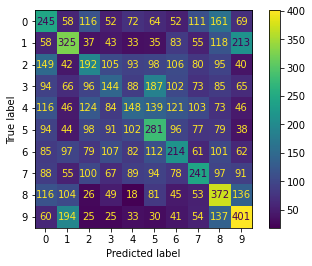

In [292]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_test_predicted, labels=log_reg.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
display.plot()

## Performance Metrics

In [306]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.22      0.24      0.23      1000
           1       0.32      0.33      0.32      1000
           2       0.22      0.19      0.20      1000
           3       0.19      0.14      0.16      1000
           4       0.20      0.15      0.17      1000
           5       0.25      0.28      0.26      1000
           6       0.23      0.21      0.22      1000
           7       0.27      0.24      0.25      1000
           8       0.28      0.37      0.32      1000
           9       0.35      0.40      0.37      1000

    accuracy                           0.26     10000
   macro avg       0.25      0.26      0.25     10000
weighted avg       0.25      0.26      0.25     10000



In [308]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds, precision, recall, threshold):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    
    plt.plot([threshold, threshold], [0., precision], "r:")
    plt.plot([0, threshold], [precision, precision], "r:")
    plt.plot([0, threshold], [recall, recall], "r:")
    plt.plot([threshold], [precision], "ro")
    plt.plot([threshold], [recall], "ro")

    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)                              
    plt.axis([0, 1.0, 0, 1])


def plot_precision_vs_recall(precisions, recalls, precision, recall):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.plot([recall, recall], [0., precision], "r:")
    plt.plot([0.0, recall], [precision, precision], "r:")
    plt.plot([recall], [precision], "ro")
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

In [309]:
y_test_probs = log_reg.predict_proba(X_test)
y_test_probs

array([[0.09691798, 0.00963843, 0.23674865, ..., 0.10515106, 0.09278485,
        0.00381368],
       [0.00857073, 0.066712  , 0.0063789 , ..., 0.0018677 , 0.0931519 ,
        0.8131236 ],
       [0.07025933, 0.01299475, 0.05143493, ..., 0.02101171, 0.62274559,
        0.16014212],
       ...,
       [0.089941  , 0.00436527, 0.06935522, ..., 0.10002573, 0.04159423,
        0.01300237],
       [0.01686924, 0.18945089, 0.01993657, ..., 0.01988636, 0.04028837,
        0.05240094],
       [0.15582937, 0.0335969 , 0.16618628, ..., 0.15278751, 0.11147619,
        0.0152837 ]])

In [310]:
y_test_prob = y_test_probs[:,1]
y_test_prob

array([0.00963843, 0.066712  , 0.01299475, ..., 0.00436527, 0.18945089,
       0.0335969 ])

In [354]:
label_names = pd.Series(meta_data['label_names'])
print("Labels to the label names:")
print(label_names)



Labels to the label names:
0      airplane
1    automobile
2          bird
3           cat
4          deer
5           dog
6          frog
7         horse
8          ship
9         truck
dtype: object


In [ ]:
label_names[y_train[0]]

'frog'

## Random Forest

Scaling Feature. Scaling data set before feeding to the model is critical in Machine Learning as it reduces the effect of outliers on the model’s predictions.

In [38]:
# Importing standardScaler
from sklearn.preprocessing import StandardScaler

# scalling the input data
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

After scaling, feed the training data to our model to train it.

In [39]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rf_classifier = RandomForestClassifier()

# fit the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

Now our model is trained, we can provide any input values (X_test) to predict the output.

In [40]:
# predicting the outcome
y_output = rf_classifier.predict(X_test)

# printing the output
print(y_output)

[6 8 8 ... 5 3 7]


In [41]:
# testing the model
y_pred = rf_classifier.predict(X_test)

# importing accuracy score
from sklearn.metrics import accuracy_score

# printing the accuracy of the model
print("Accuracy:", accuracy_score(y_test, y_pred))
default_accuracy = accuracy_score(y_test, y_pred)

Accuracy: 0.4126


## Confusion Matrix

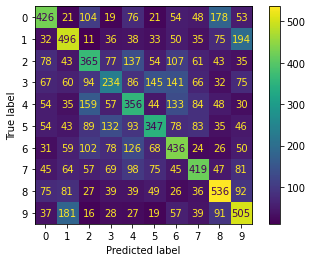

In [77]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot the confusion matrix in graph
cm = confusion_matrix(y_test,y_pred, labels=rf_classifier.classes_)

# ploting with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_classifier.classes_)
disp.plot()

# showing the matrix
plt.show()

## Performance Metrics

In [78]:
# Importing classification report
from sklearn.metrics import classification_report

# printing the report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.43      0.45      1000
           1       0.46      0.50      0.48      1000
           2       0.36      0.36      0.36      1000
           3       0.30      0.23      0.26      1000
           4       0.33      0.36      0.34      1000
           5       0.41      0.35      0.37      1000
           6       0.39      0.44      0.41      1000
           7       0.47      0.42      0.44      1000
           8       0.48      0.54      0.51      1000
           9       0.43      0.51      0.47      1000

    accuracy                           0.41     10000
   macro avg       0.41      0.41      0.41     10000
weighted avg       0.41      0.41      0.41     10000



# Grid Search on Random Forest

Initializing GridSearchCV() object and fitting it with hyperparameters.

In [54]:
# Create the param grid
param_grid = { 
    'bootstrap': [True],
    # number of trees in random forest
    'n_estimators': [200, 700],
    # number of features to consider at every split
    'max_features': ['auto', 'sqrt', 'log2'],

}

It takes 4 arguments i.e. estimator, param_grid, cv, and scoring.

1. estimator – A scikit-learn model

2. param_grid – A dictionary with parameter names as keys and lists of parameter values.

3. scoring – The performance measure. For example, ‘r2’ for regression models, ‘precision’ for classification models.

4. cv – An integer that is the number of folds for K-fold cross-validation.

In [55]:
from sklearn.model_selection import GridSearchCV

CV_rfc = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv= 5, n_jobs=5, verbose=1, scoring='accuracy')
CV_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=5,
             param_grid={'bootstrap': [True],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]},
             scoring='accuracy', verbose=1)

Getting the Best Hyperparameters.

In [56]:
CV_rfc.best_params_

{'bootstrap': True, 'max_features': 'auto', 'n_estimators': 700}

In [62]:
CV_rfc.best_score_

0.43082000000000004

## Check Accuracy

In [70]:
CV_rfc.score(X_test, y_test)

0.4392